In [53]:
#imports all nessary librarys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [42]:
#loads in fashion data, sets training and test data
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [43]:
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
X_test = X_test / 255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [86]:
from functools import partial

my_dense_layer = partial(tf.keras.layers.Dense, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001))
my_conv_layer = partial(tf.keras.layers.Conv2D, activation="relu", padding="valid")

model = tf.keras.models.Sequential([
    
    my_conv_layer(32,3,padding="same",input_shape=[28,28,1]),
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
    tf.keras.layers.Dropout(0.2),
    
    my_conv_layer(16,3,padding="same",input_shape=[28,28,1]),
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    my_dense_layer(32),
    my_dense_layer(10, activation="softmax")
    
    
])

In [87]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=["accuracy"])

In [88]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 52s 952us/sample - loss: 0.5605 - accuracy: 0.7987 - val_loss: 0.3783 - val_accuracy: 0.8716
Epoch 2/10
55000/55000 [==============================] - 54s 979us/sample - loss: 0.3893 - accuracy: 0.8641 - val_loss: 0.3318 - val_accuracy: 0.8922
Epoch 3/10
55000/55000 [==============================] - 54s 980us/sample - loss: 0.3488 - accuracy: 0.8785 - val_loss: 0.3059 - val_accuracy: 0.8988
Epoch 4/10
55000/55000 [==============================] - 54s 981us/sample - loss: 0.3234 - accuracy: 0.8882 - val_loss: 0.2885 - val_accuracy: 0.9046
Epoch 5/10
55000/55000 [==============================] - 54s 978us/sample - loss: 0.3071 - accuracy: 0.8946 - val_loss: 0.2830 - val_accuracy: 0.9042
Epoch 6/10
55000/55000 [==============================] - 51s 935us/sample - loss: 0.2982 - accuracy: 0.8985 - val_loss: 0.2621 - val_accuracy: 0.9122
Epoch 7/10
55000/55000 [=====================

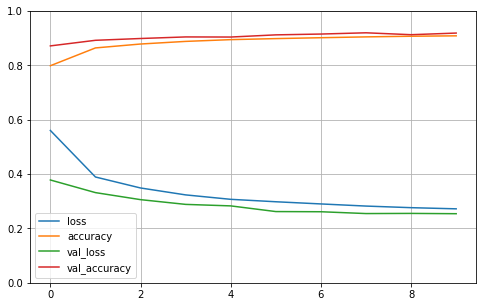

In [89]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [90]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train, y_pred)
print(conf_train)

[[4867    1   86   91    5    1  482    0   10    0]
 [   1 5378    2   57    3    0    1    0    2    0]
 [  30    3 5043   46  143    0  227    0    4    0]
 [  74   20   12 5181  122    0   89    0    1    0]
 [   3    4  391  122 4557    0  432    0    3    0]
 [   0    0    0    0    0 5445    0   32    2   28]
 [ 461    3  315  118  172    0 4429    0    9    0]
 [   0    0    0    0    0   52    0 5189    1  246]
 [   2    0   10    9   15    3   30    0 5441    0]
 [   0    0    0    0    1   11    0   67    1 5414]]


In [91]:
model.evaluate(X_test,y_test) 

10000/10000 [==============================] - 2s 222us/sample - loss: 0.2783 - accuracy: 0.9062


[0.27826369936466216, 0.9062]

In [84]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[882   1   7  24   2   2  79   0   3   0]
 [  1 975   0  15   5   0   2   0   2   0]
 [ 21   1 803  12  87   0  76   0   0   0]
 [ 19   6   3 926  24   0  22   0   0   0]
 [  1   1  28  21 901   0  47   0   1   0]
 [  0   0   0   1   0 964   0  23   0  12]
 [137   1  36  31  82   0 706   0   7   0]
 [  0   0   0   0   0   5   0 966   0  29]
 [  5   2   2   5   1   2   4   5 974   0]
 [  0   0   0   0   0   2   1  24   0 973]]


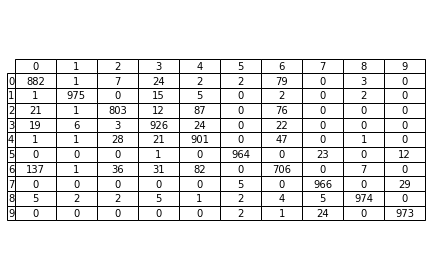

In [92]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# create table and save to file
df = pd.DataFrame(conf_test)
ax.table(cellText=df.values, rowLabels=np.arange(10), colLabels=np.arange(10), loc='center', cellLoc='center')
fig.tight_layout()
plt.savefig('conf_mat.pdf')